# Final Project: Machine Learning with Lending Club Dataset - Oct 2017

# Step 1 
- Import needed libraries and load data into dataframe for analysis

In [2]:
"""
Load Lending Club dataset
"""
import pandas as pd
import numpy as np
# give the path to the file 
path_to_file = "./LoanStats_2017Q2.csv"
data = pd.read_csv(path_to_file)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105451 entries, 0 to 105450
Columns: 137 entries, id to hardship_last_payment_amount
dtypes: float64(60), int64(52), object(25)
memory usage: 110.2+ MB


# Step 2 
- Lets check all the columns with all null values

In [4]:
data.columns[data.isnull().all()].tolist()

['id',
 'member_id',
 'url',
 'desc',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount']

In [3]:
# Drop all columns with null or nan values
df = data.dropna(axis=1, how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105451 entries, 0 to 105450
Columns: 119 entries, loan_amnt to hardship_flag
dtypes: float64(42), int64(52), object(25)
memory usage: 95.7+ MB


- Hence, we dropped 137-119 = 18 columns

In [6]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag
0,16000,16000,16000,60 months,12.62%,360.95,C,C1,teacher,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,8000,8000,8000,36 months,14.08%,273.74,C,C3,Registered Nurse,9 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,26000,26000,26000,36 months,9.93%,838.10,B,B2,Dealer,7 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,18950,18950,18950,60 months,21.45%,517.47,D,D5,QA Manager,1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,9600,9600,9600,36 months,7.97%,300.70,A,A5,Physician Assistant,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


# Step 3
- feature selection and data exploration
- Lets analyze each column data and clean data

In [15]:
df.query('loan_amnt != funded_amnt').iloc[:,:2]

,loan_amnt,funded_amnt


In [18]:
df.query('funded_amnt_inv != funded_amnt').iloc[:,1:3].head()

,funded_amnt,funded_amnt_inv
2059,8000,7975
2106,24950,24700
2113,12000,11500
2153,32000,31975
2193,25000,24925


 - As you can see above there is no difference in loan_amount and funded amount. I also checked in Data Dictionary file provided by Lending Club. Looks like loan amount reflects the credit department approval amount.
 - On the other side there is some difference between funded amount and funded amount commited by investors. It will be a good analysis point why and how this amount gets calculated.

In [74]:
# for now I am keeping the term field as is
df.term.value_counts()

 36 months    77105
 60 months    28346
Name: term, dtype: int64

In [4]:
# This line of code will convert interest rate column to float values. 
# As this will help us in our analysis and calculation.
df.loc[:,'int_rate'] = df.loc[:,'int_rate'].str.replace('%', '').astype(float)
df.int_rate.dtype

/Users/neerajsomani/anaconda/envs/env_dsa/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


dtype('float64')

In [88]:
df.iloc[:,8:14].head()

,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d
0,teacher,10+ years,MORTGAGE,94000.0,Not Verified,Jun-2017
1,Registered Nurse,9 years,RENT,120000.0,Verified,Jun-2017
2,Dealer,7 years,OWN,57900.0,Not Verified,Jun-2017
3,QA Manager,1 year,MORTGAGE,130000.0,Verified,Jun-2017
4,Physician Assistant,< 1 year,OWN,140000.0,Not Verified,Jun-2017


- emp_title is not important field for our analysis.

In [5]:
df.drop(['emp_title'],1, inplace=True)

/Users/neerajsomani/anaconda/envs/env_dsa/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
# lets work on next column, emp_length might be helpful for our analysis
df.emp_length.value_counts()

10+ years    35438
2 years       9914
< 1 year      9542
3 years       8495
1 year        7034
n/a           6697
4 years       6453
5 years       6382
6 years       4526
7 years       3847
9 years       3828
8 years       3295
Name: emp_length, dtype: int64

In [6]:
df.replace('n/a', np.nan,inplace=True)
df['emp_length'].fillna(value=0,inplace=True)
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'].dtype

/Users/neerajsomani/anaconda/envs/env_dsa/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/neerajsomani/anaconda/envs/env_dsa/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/neerajsomani/anaconda/envs/env_dsa/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

dtype('O')

In [92]:
df.home_ownership.value_counts()

MORTGAGE    52502
RENT        41069
OWN         11873
ANY             5
NONE            2
Name: home_ownership, dtype: int64

In [93]:
df.verification_status.value_counts()

Source Verified    40622
Not Verified       37599
Verified           27230
Name: verification_status, dtype: int64

In [94]:
df.issue_d.value_counts()

Jun-2017    38087
May-2017    37681
Apr-2017    29683
Name: issue_d, dtype: int64

- As you can see above the column data type is int but values looks like string. Lets remove '-2017' from values and make this column as string.

In [7]:
df.loc[:,'issue_d'] = df.loc[:,'issue_d'].str.replace('-2017', '')
#df.int_rate.dtype
#df.issue_d.astype(str).replace('-2017', '').astype(str)
df.issue_d.value_counts()

/Users/neerajsomani/anaconda/envs/env_dsa/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Jun    38087
May    37681
Apr    29683
Name: issue_d, dtype: int64

In [97]:
df.iloc[:,13:21].head()

,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs
0,Jun,Current,n,debt_consolidation,Debt consolidation,021xx,MA,25.61,0
1,Jun,Current,n,vacation,Vacation,070xx,NJ,31.58,0
2,Jun,Current,n,home_improvement,Home improvement,198xx,DE,12.19,0
3,Jun,Current,n,credit_card,Credit card refinancing,950xx,CA,31.39,0
4,Jun,Current,n,credit_card,Credit card refinancing,880xx,NM,18.34,0


In [57]:
# Not sure about loan status currently, so keeping it as is for now
df.loan_status.value_counts()

Current               99850
Fully Paid             3896
In Grace Period         932
Late (31-120 days)      436
Late (16-30 days)       312
Charged Off              25
Name: loan_status, dtype: int64

In [98]:
df.pymnt_plan.value_counts()

n    105451
Name: pymnt_plan, dtype: int64

In [8]:
# as you can see above this column doesn't has any meaning value, so droping it.
df.drop(['pymnt_plan','purpose','title'], axis=1, inplace=True)

/Users/neerajsomani/anaconda/envs/env_dsa/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


- I am keeping zip_code as we can analyze the location info

In [101]:
df.zip_code.isnull().any()

False

In [102]:
df.addr_state.isnull().any()

False

In [109]:
print('have null in dti: ' , df.dti.isnull().any())
print('how many null values: ', df.dti.isnull().sum())

have null in dti:  True
how many null values:  75


In [111]:
df.delinq_2yrs.isnull().any()

False

In [115]:
df.iloc[:,18:25].head()

,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal
0,Jun-1992,0,NaN,NaN,9,0,33752
1,Nov-2006,0,NaN,NaN,16,0,36658
2,Jul-1998,0,NaN,69.0,7,1,6857
3,Mar-1982,2,35.0,NaN,12,0,329271
4,Aug-2005,0,37.0,NaN,16,0,11808


- earliest_cr_line (earliest credit line) column is important as this will tell us about the oldest creadit history. Also, this will help us t consider if someone is going to get retire or health issue. We will consider this for our analysis.

In [9]:
from datetime import datetime

df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line)

dttoday = datetime.now().strftime('%Y-%m-%d')
# There is a better way to do this. Need to check that.
df.earliest_cr_line = df.earliest_cr_line.apply(lambda x: (
        np.timedelta64((x - pd.Timestamp(dttoday)),'D').astype(int))/-365)

#df.earliest_cr_line

/Users/neerajsomani/anaconda/envs/env_dsa/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [136]:
print(df.inq_last_6mths.isnull().any())
df.inq_last_6mths.value_counts()

False


0    67430
1    26572
2     8336
3     2197
4      687
5      229
Name: inq_last_6mths, dtype: int64

In [146]:
df.mths_since_last_delinq.isnull().sum()
df.mths_since_last_record.isnull().sum()
df.revol_bal.isnull().sum()

0

In [10]:
# since 50% of the column value is not avialable, lets drop this column
df.drop(['mths_since_last_delinq','mths_since_last_record'], axis=1, inplace=True)

/Users/neerajsomani/anaconda/envs/env_dsa/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


- Open_acc, pub_rec, and revol_bal is also looking not so important but keeping it for now.

In [151]:
df.iloc[:,23:31].head()

,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp
0,105.8%,26,w,15612.60,15612.60,616.29,616.29,387.40
1,86.7%,28,w,7820.13,7820.13,258.10,258.10,179.87
2,12.4%,10,w,25377.05,25377.05,802.24,802.24,622.95
3,98%,17,w,18771.26,18771.26,461.01,461.01,178.74
4,48.6%,44,w,9363.06,9363.06,290.07,290.07,236.94


In [11]:
# Below are the list of fields that are post loan attributes, so lets drop all of them for now.

df.drop(['out_prncp','out_prncp_inv','total_pymnt', 'total_pymnt_inv','total_rec_prncp', 
         'grade', 'sub_grade', 'total_rec_int','total_rec_late_fee',
         'recoveries','collection_recovery_fee',
         'collection_recovery_fee', 'last_pymnt_d','last_pymnt_amnt',
         'next_pymnt_d','last_credit_pull_d'] ,1, inplace=True)

/Users/neerajsomani/anaconda/envs/env_dsa/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [12]:
df.loc[:,'revol_util'] = df.loc[:,'revol_util'].str.replace('%', '').astype(float)
df.revol_util.dtype

/Users/neerajsomani/anaconda/envs/env_dsa/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


dtype('float64')

In [170]:
df.iloc[:,-13:-2].isnull().sum()

revol_bal_joint                         98645
sec_app_earliest_cr_line                98645
sec_app_inq_last_6mths                  98645
sec_app_mort_acc                        98645
sec_app_open_acc                        98645
sec_app_revol_util                      98722
sec_app_open_il_6m                      98645
sec_app_num_rev_accts                   98645
sec_app_chargeoff_within_12_mths        98645
sec_app_collections_12_mths_ex_med      98645
sec_app_mths_since_last_major_derog    103117
dtype: int64

- since more than 70% of the values are null and credit score is not availbale, we are droping above columns from our analysis.

In [13]:
df.drop(['revol_bal_joint',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_il_6m', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'initial_list_status', 'hardship_flag','annual_inc_joint', 'dti_joint', 'verification_status_joint', 
        'mths_since_last_major_derog'], 1, inplace=True)

/Users/neerajsomani/anaconda/envs/env_dsa/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
print(df.columns.tolist())
print('Total columns: ' ,len(df.columns.tolist()))

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_

In [15]:
df.fillna(0.0,inplace=True)
df.fillna(0,inplace=True)

/Users/neerajsomani/anaconda/envs/env_dsa/lib/python3.6/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


# Overall Analysis so far:
So far as part of Data munging, I have tried to work on following points:

- Addressed missing data
- Converted strings to numerical representations where possible
- Dropped superfluous attributes


# Lets plot a correlation matrix to understand it more

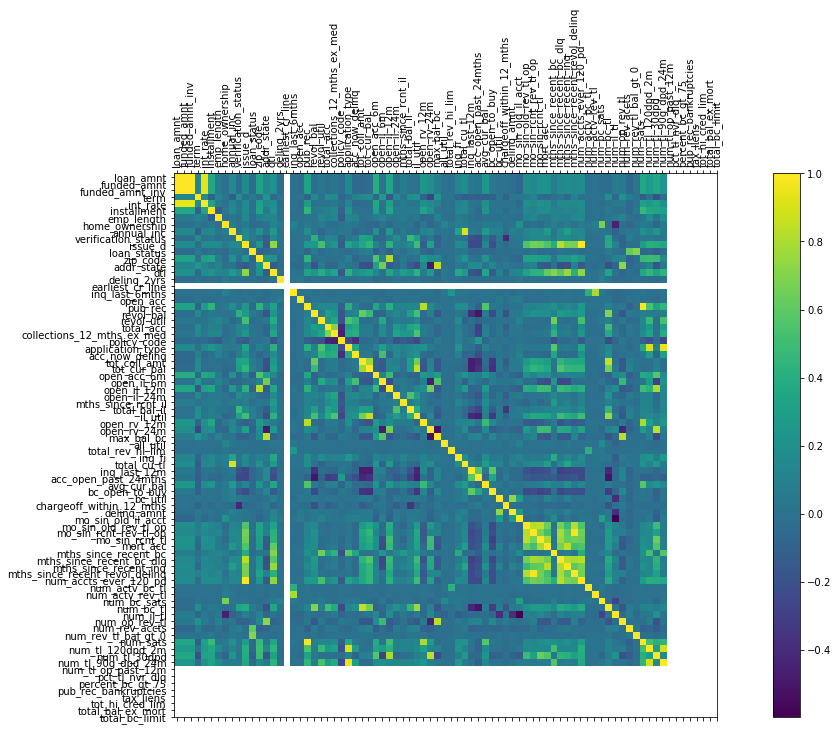

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr())
fig.colorbar(cax)
ticks = np.arange(0,80)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns, rotation='vertical')
ax.set_yticklabels(df.columns)
plt.show()

# Highly correlated Data
Let's examine our dataframes correlation matrix and drop highly correlated/redundant data to address multicollinearity.

In [36]:
cor = df.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

funded_amnt                     loan_amnt                   1.000000
funded_amnt_inv                 loan_amnt                   0.999995
                                funded_amnt                 0.999995
installment                     loan_amnt                   0.947774
                                funded_amnt                 0.947774
                                funded_amnt_inv             0.947644
total_acc                       open_acc                    0.729980
open_il_24m                     open_il_12m                 0.702409
open_rv_12m                     open_acc_6m                 0.628321
open_rv_24m                     open_rv_12m                 0.772020
max_bal_bc                      revol_bal                   0.561012
all_util                        revol_util                  0.651157
total_rev_hi_lim                revol_bal                   0.814604
inq_last_12m                    inq_fi                      0.556817
acc_open_past_24mths            op

# Lets note down few points here to understand and drop not needed columns.
- As you can see, funded_amnt, funded_amnt_inv, and installment is closely related to loan_amnt. Which means whatever the loan amount was requested was considered closely to funded amount. and installment is after getting loan amount. So, we can drop these 3 fields for our analysis.
- total_acc is closely related to open_acc. Lets keep open_acc.
- Let's keep 'open_il_24m' and 'open_rv_24m' and drop all other correlated columns. 24 month history is enough for this analysis.
- Lets keep revol_bal. drop max_bal_bc, total_rev_hi_lim, 
- lets keep all_util, and drop revol_util and bc_util. We need check again about il_util later.
- Lets keep 'acc_now_delinq', all other delinq related info can be dropped.
- Lets keep pub_rec, and drop pub_rec_bankruptcies, tax_liens

In [16]:
df.drop(['funded_amnt', 'funded_amnt_inv','installment', 'total_acc','open_il_12m', 
         'open_rv_12m' , 'max_bal_bc', 'revol_util', 'bc_util', 'total_rev_hi_lim',
         'acc_open_past_24mths' , 'inq_last_12m', 'avg_cur_bal', 'bc_open_to_buy', 
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl' , 'mort_acc', 'mths_since_recent_bc', 
        'mths_since_recent_revol_delinq', 'mths_since_recent_bc_dlq', 'num_actv_bc_tl',
        'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_rev_tl_bal_gt_0', 'num_op_rev_tl',
        'num_tl_op_past_12m', 'open_acc_6m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 
         'num_tl_120dpd_2m', 'num_accts_ever_120_pd', 'percent_bc_gt_75', 'total_bal_ex_mort',
        'total_bc_limit', 'total_il_high_credit_limit'],1,inplace=True)

/Users/neerajsomani/anaconda/envs/env_dsa/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105451 entries, 0 to 105450
Data columns (total 45 columns):
loan_amnt                     105451 non-null int64
term                          105451 non-null object
int_rate                      105451 non-null float64
emp_length                    105451 non-null object
home_ownership                105451 non-null object
annual_inc                    105451 non-null float64
verification_status           105451 non-null object
issue_d                       105451 non-null object
loan_status                   105451 non-null object
zip_code                      105451 non-null object
addr_state                    105451 non-null object
dti                           105451 non-null float64
delinq_2yrs                   105451 non-null int64
earliest_cr_line              105451 non-null float64
inq_last_6mths                105451 non-null int64
open_acc                      105451 non-null int64
pub_rec                       105451 non-

In [39]:
cor = df.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

mo_sin_old_rev_tl_op  earliest_cr_line    0.909526
num_il_tl             open_il_6m          0.645738
                      total_bal_il        0.583650
num_rev_accts         open_acc            0.681920
num_sats              open_acc            0.998727
                      num_rev_accts       0.676599
pub_rec_bankruptcies  pub_rec             0.614929
tax_liens             pub_rec             0.712401
tot_hi_cred_lim       tot_cur_bal         0.983478
dtype: float64

In [17]:
df.drop(['pub_rec_bankruptcies', 'tax_liens', 'num_rev_accts', 'tot_hi_cred_lim', 'policy_code'],1,inplace=True)

/Users/neerajsomani/anaconda/envs/env_dsa/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
cor = df.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

mo_sin_old_rev_tl_op  earliest_cr_line    0.909526
num_il_tl             open_il_6m          0.645738
                      total_bal_il        0.583650
num_sats              open_acc            0.998727
dtype: float64

# Lets plot correlation matrix again

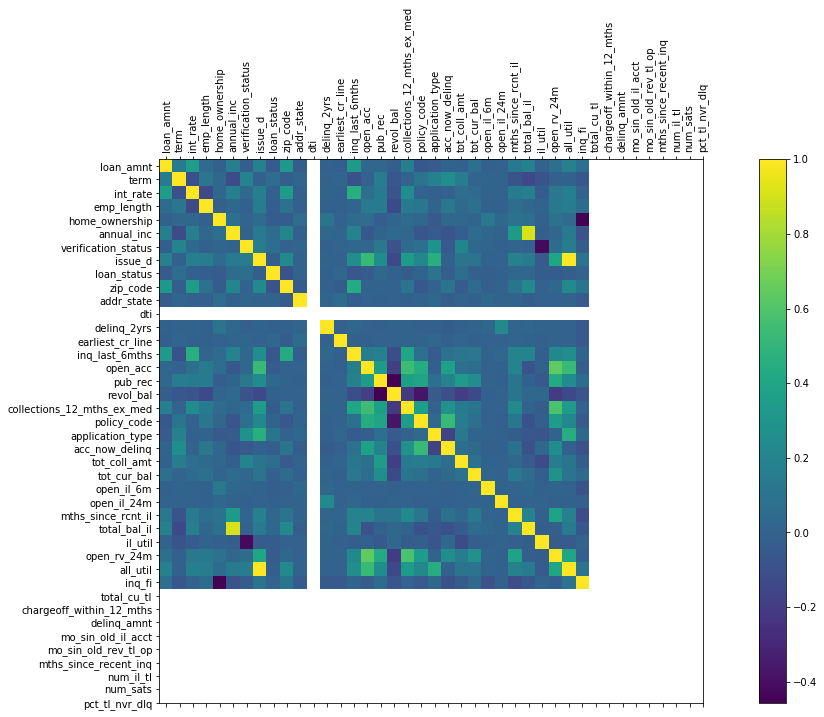

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr())
fig.colorbar(cax)
ticks = np.arange(0,40)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns, rotation='vertical')
ax.set_yticklabels(df.columns)
plt.show()

# Not sure about few columns:
- we dont need these columns, kind of. collections_12_mths_ex_med, mths_since_rcnt_il, total_cu_tl, chargeoff_within_12_mths
- open_il_6m, open_il_24m (see below for these 2). value comparison doesn't make sense.
- il_util is ratio, but not clear about all_util (it looks like). we can keep only all_util.
- open_acc, num_sats not sure what to do.
- I think I can drop column loan_status as well. This is after the loan amount gets approved or defaulted. Its not helpful for predicting default loan amount and int_rate.

In [43]:
df.loc[0:5,['open_il_6m', 'open_il_24m', 'open_acc', 'num_sats']]

,open_il_6m,open_il_24m,open_acc,num_sats
0,1,0,9,9
1,5,2,16,16
2,2,0,7,7
3,2,1,12,12
4,5,3,16,16
5,4,4,9,9


# Not sure do we have to apply PCA and LDA in our analysis

In [49]:
df.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,zip_code,...,inq_fi,total_cu_tl,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mths_since_recent_inq,num_il_tl,num_sats,pct_tl_nvr_dlq
0,16000,60 months,12.62,10,MORTGAGE,94000.0,Not Verified,Jun,Current,021xx,...,0,6,0,0,26.0,300,8.0,1,9,100.0
1,8000,36 months,14.08,9,RENT,120000.0,Verified,Jun,Current,070xx,...,1,0,0,0,118.0,127,13.0,14,16,100.0
2,26000,36 months,9.93,7,OWN,57900.0,Not Verified,Jun,Current,198xx,...,1,0,0,0,153.0,227,22.0,5,7,100.0
3,18950,60 months,21.45,1,MORTGAGE,130000.0,Verified,Jun,Current,950xx,...,0,0,0,0,46.0,423,0.0,2,12,88.0
4,9600,36 months,7.97,1,OWN,140000.0,Not Verified,Jun,Current,880xx,...,1,3,0,0,132.0,135,3.0,29,16,93.2


# Lets do feature selection based on below 4 points. Some basic methods from a mathematics perspective:
# feature selection based on Lecture Notes
- Removing features with low variance
- Univariate feature selection (using sklearn feature selection lib)
- L1/L2-based feature selection (using Ridge, Lasso, ElasticNet regression {L1 penalty, L2 penalty})
- Tree-based feature selection 
---------------------------------------
- Grid Search CV (cross validation)
- table plot - check

In [1]:
df.info()

NameError: name 'df' is not defined